# Titanic: Machine Learning from Disaster


- 문제 파악 
- 데이타 획득 
- 데이타 분석
- Feature engineering
- 모델링
- 테스팅 

In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.display import Image

from IPython.core.display import display, HTML
display(HTML("<style>.container { font-weight: bold !important; }</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))

## 1. 문제 파악

타이타닉호의 생존자를 예측해라

In [2]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

## 2. 데이타 획득

kaggle ( https://www.kaggle.com/c/titanic/data )  

### load train, test dataset using Pandas

In [3]:
import pandas as pd
import numpy as np

In [4]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [5]:
train.columns, len(train.columns)

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'), 12)

In [6]:
# 'Survived' X
test.columns, len(test.columns)

(Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'), 11)

In [7]:
train.shape, test.shape

((891, 12), (418, 11))

## 3. 데이타 분석


### Data Dictionary
- Survived: 	0 = No, 1 = Yes  
- pclass: 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  	
- sibsp:	# of siblings / spouses aboard the Titanic  	
- parch:	# of parents / children aboard the Titanic  	
- ticket:	Ticket number	
- cabin:	Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  

In [8]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Total rows and columns**

We can see that there are 891 rows and 12 columns in our training dataset.

In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
train.shape

(891, 12)

In [11]:
test.shape

(418, 11)

In [12]:
# Age, Cabin, Embarked 컬럼은 누락값이 있다
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [13]:
# Age, Cabin, Fare 컬럼은 누락값이 있다
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [14]:
# 누락값의 갯수 확인
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 시각화( visualization )

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

### Bar Chart for Categorical Features
- Pclass
- Sex
- SibSp ( # of siblings and spouse)
- Parch ( # of parents and children)
- Embarked
- Cabin

In [17]:
# 컬럼에 따라 막대 그래프를 생성하는 함수 정의 
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

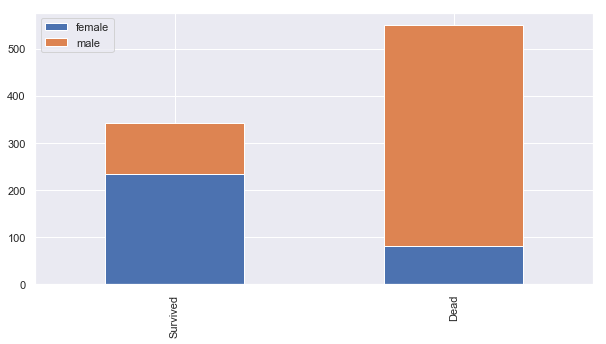

In [18]:
bar_chart('Sex')

In [19]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

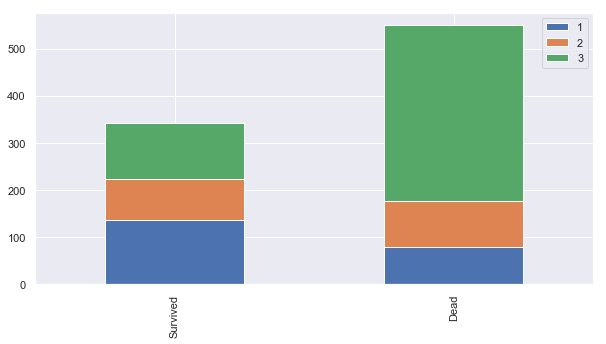

In [20]:
bar_chart('Pclass')

In [21]:
train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

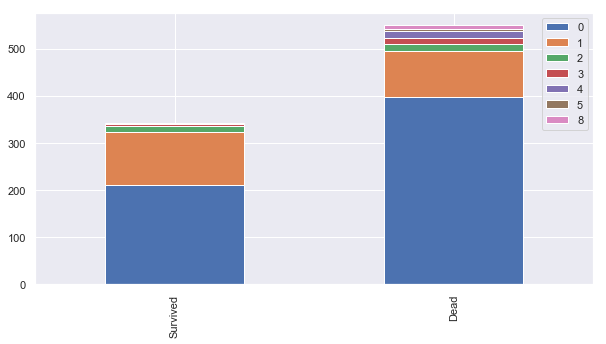

In [22]:
bar_chart('SibSp')

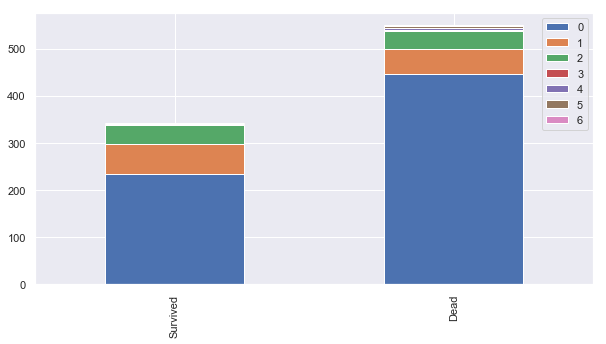

In [23]:
bar_chart('Parch')

In [24]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

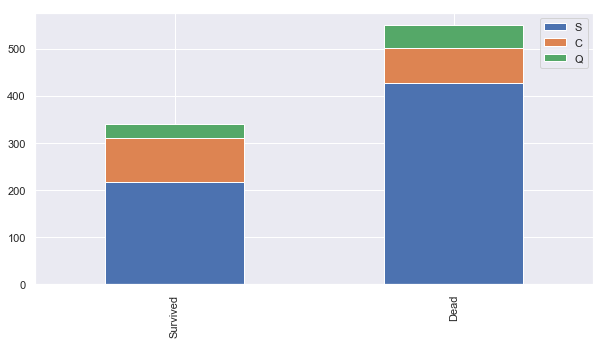

In [25]:
bar_chart('Embarked')

The Chart confirms **a person aboarded from C** slightly more likely survived  
The Chart confirms **a person aboarded from Q** more likely dead  
The Chart confirms **a person aboarded from S** more likely dead

# 전처리( Feature engineering)


In [26]:
# train.head()

## how titanic sank?

sank from the bow of the ship where third class rooms located  
conclusion, Pclass is key feature for classifier

In [27]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

In [28]:
# train.head(10)

### Name 전처리

- Name 컬럼에서 의미있는 단어 찾기 

In [29]:
# train['Name'] 카테고리화
# Mr 0/ Miss 1 / Mrs 2 / Other 3  ...

In [30]:
# train['Name']

In [31]:
# 
train_test_data = [train, test] 
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', 
                                                   expand=False)

In [32]:
# train.head(3)
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr


In [33]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Sir           1
Mme           1
Jonkheer      1
Countess      1
Capt          1
Ms            1
Lady          1
Don           1
Name: Title, dtype: int64

In [34]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

#### 숫자로 분류시키기 (Title map) => title 컬럼
Mr : 0  
Miss : 1  
Mrs: 2  
Others: 3


In [35]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 1, "Lady": 1, "Jonkheer": 3, "Don": 0, "Dona" : 1, "Mme": 2,"Capt": 3,"Sir": 0 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [36]:
train['Title'].value_counts()
test['Title'].value_counts()

0    240
1     80
2     72
3     26
Name: Title, dtype: int64

In [63]:
# Title 컬럼값 확인
train.info(),
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
Title          891 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Em

In [38]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0


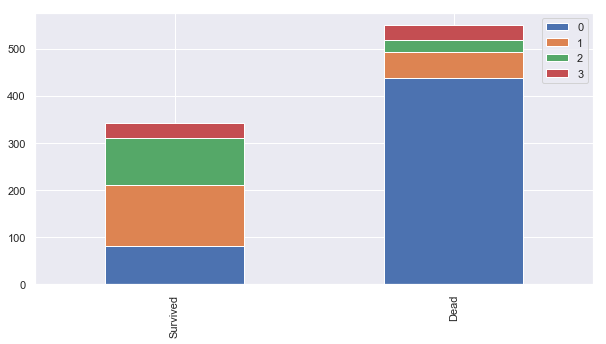

In [39]:
bar_chart('Title')

In [40]:
# Name 컬럼 삭제
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [42]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


### Sex 전처리 

male: 0
female: 1

In [43]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

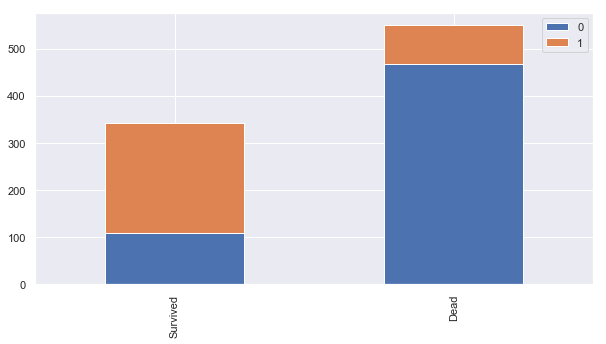

In [44]:
bar_chart('Sex')

### Age 전처리 

- 누락값 NaN
- 연속데이타를 카테고리화 

In [45]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.00,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.00,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.00,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.00,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.00,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.00,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.00,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.00,1,0,237736,30.0708,NaN,C,2


In [46]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [47]:
# train.head(30)
# train.groupby("Title")["Age"].transform("median")

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


## Age & Survied  - FacetGrid 시각화

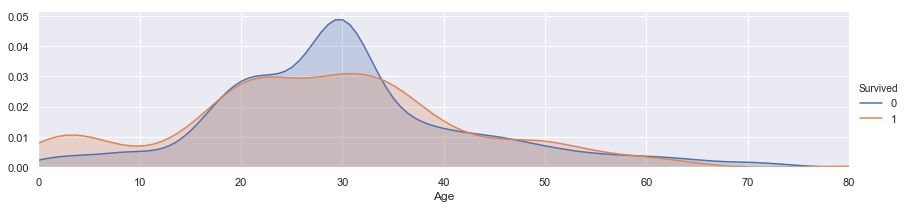

In [48]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show() 

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


## Age 카테고리화 

- 구간 분류 후 숫자값으로 채우기 
Binning/Converting Numerical Age to Categorical Variable  

feature vector map:  
child: 0  
young: 1  
adult: 2  
mid-age: 3  
senior: 4

In [50]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <=16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[dataset['Age'] > 62, 'Age'] =4

In [51]:
test[test['Age'] >0]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,3.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,S,2
6,898,3,1,2.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,0,1.0,1,1,248738,29.0000,NaN,S,0
8,900,3,1,1.0,0,0,2657,7.2292,NaN,C,2
9,901,3,0,1.0,2,0,A/4 48871,24.1500,NaN,S,0
10,902,3,0,2.0,0,0,349220,7.8958,NaN,S,0


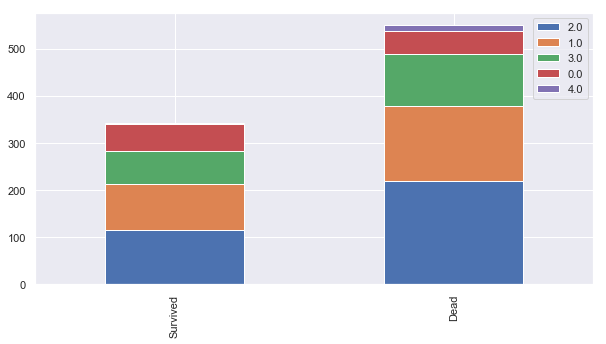

In [52]:
bar_chart('Age')

In [53]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
print(Pclass1,Pclass2,Pclass3)

S    127
C     85
Q      2
Name: Embarked, dtype: int64 S    164
C     17
Q      3
Name: Embarked, dtype: int64 S    353
Q     72
C     66
Name: Embarked, dtype: int64


In [54]:
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class','3rd class']
df

,S,C,Q
1st class,127,85,2
2nd class,164,17,3
3rd class,353,66,72


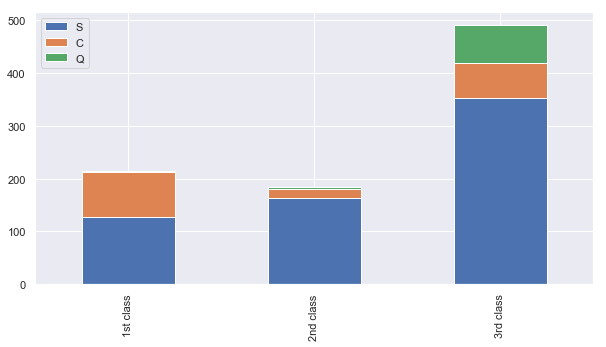

In [56]:
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [57]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [58]:
embarked_mapping = {"S":0,"C":1,"Q":2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [59]:
test['Fare'].isnull().sum()

1

In [60]:
test["Fare"].fillna(test['Fare'].mean())

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
5        9.2250
6        7.6292
7       29.0000
8        7.2292
9       24.1500
10       7.8958
11      26.0000
12      82.2667
13      26.0000
14      61.1750
15      27.7208
16      12.3500
17       7.2250
18       7.9250
19       7.2250
20      59.4000
21       3.1708
22      31.6833
23      61.3792
24     262.3750
25      14.5000
26      61.9792
27       7.2250
28      30.5000
29      21.6792
         ...   
388      7.7500
389     21.0750
390     93.5000
391     39.4000
392     20.2500
393     10.5000
394     22.0250
395     60.0000
396      7.2500
397     79.2000
398      7.7750
399      7.7333
400    164.8667
401     21.0000
402     59.4000
403     47.1000
404     27.7208
405     13.8625
406     10.5000
407    211.5000
408      7.7208
409     13.7750
410      7.7500
411     90.0000
412      7.7750
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418,

In [62]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [65]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df

,C,B,D,E,A,T,F,G
1st class,59.0,47.0,29.0,25.0,15.0,1.0,NaN,NaN
2nd class,NaN,NaN,4.0,4.0,NaN,NaN,8.0,NaN
3rd class,NaN,NaN,NaN,3.0,NaN,NaN,5.0,4.0


In [66]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [67]:
# Pclass의 중간값으로 
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [68]:
train["Cabin"].value_counts()

2.0    492
1.8    168
0.8     99
0.4     47
1.2     33
1.6     32
0.0     15
2.4      4
2.8      1
Name: Cabin, dtype: int64

In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null float64
Embarked       418 non-null int64
Title          418 non-null int64
dtypes: float64(3), int64(7), object(1)
memory usage: 36.0+ KB


In [71]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [73]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [74]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [75]:
train_data = train.drop('Survived', axis=1)
# Survived 만 별도 시리즈로 저장
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [77]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# 10개로 나누 경우 
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [78]:
clf = KNeighborsClassifier(n_neighbors = 13)
# scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, 
                        cv=k_fold, n_jobs=1, scoring='accuracy')
score

array([0.75555556, 0.75280899, 0.76404494, 0.71910112, 0.78651685,
       0.75280899, 0.7752809 , 0.74157303, 0.75280899, 0.79775281])

In [79]:
# kNN Score
round(np.mean(score)*100, 2)

75.98

In [80]:
clf = SVC()
score = cross_val_score(clf, train_data, target, cv=k_fold, 
                        n_jobs=1, scoring='accuracy')
print(score)

[0.75555556 0.82022472 0.79775281 0.76404494 0.79775281 0.7752809
 0.82022472 0.80898876 0.76404494 0.83146067]


In [81]:
round(np.mean(score)*100,2)

79.35

In [92]:
clf = RandomForestClassifier(n_estimators=13)

score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, 
                        scoring='accuracy')
score

array([0.74444444, 0.82022472, 0.82022472, 0.82022472, 0.84269663,
       0.78651685, 0.80898876, 0.80898876, 0.7752809 , 0.79775281])

In [93]:
# Random Forest Score
round(np.mean(score)*100, 2)

80.25

In [106]:
# 모델링
clf = RandomForestClassifier(n_estimators=13)
clf.fit(train_data, target)

# 검증
test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [107]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [108]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
